<a href="https://colab.research.google.com/github/IbniAkbar/Klasifikasi-Jenis-Sampah/blob/main/Klasifikasi_Jenis_Sampah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import glob,os,random,zipfile
import cv2
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

base_path = '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'), recursive=True)
print("Jumlah gambar:", len(img_list))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Jumlah gambar: 600


In [ ]:
print(img_list)


['/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic183.jpg', '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic292.jpg', '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic209.jpg', '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic356.jpg', '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic361.jpg', '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic193.jpg', '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic362.jpg', '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic38.jpg', '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic441.jpg', '/content/drive/My Drive/Colab Notebooks/Dataset/Garbage classification 1/plastic/plastic237.jpg', '/content/

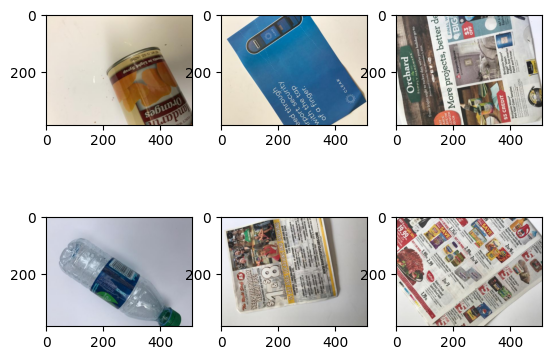

In [ ]:
for i, img_path in enumerate(random.sample(img_list, 6)):
  img = load_img(img_path)
  img = img_to_array(img, dtype=np.uint8)

  plt.subplot(2,3,i+1)
  plt.imshow(img.squeeze())

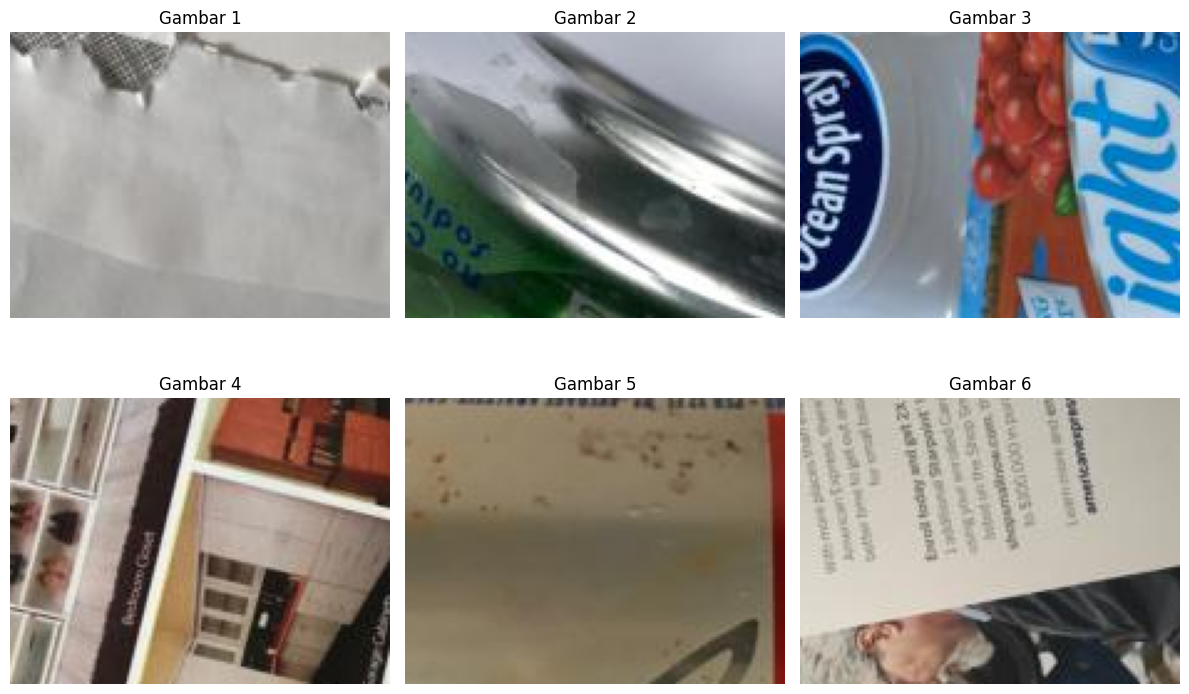

In [ ]:
def define_roi_based_on_rule(img):
    height, width = img.shape[:2]
    roi_height = int(0.3 * height)
    roi_width = int(0.3 * width)
    start_x = (width - roi_width) // 2
    start_y = (height - roi_height) // 2
    end_x = start_x + roi_width
    end_y = start_y + roi_height
    roi = img[start_y:end_y, start_x:end_x]
    return roi


crop_size = (224, 224)

random_img_list = random.sample(img_list, 6)

plt.figure(figsize=(12, 8))
for i, img_path in enumerate(random_img_list):
    img = cv2.imread(img_path)
    roi = define_roi_based_on_rule(img)

    plt.subplot(2, 3, i+1)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title("Gambar " + str(i + 1))
    plt.axis('off')

plt.tight_layout()
plt.show()


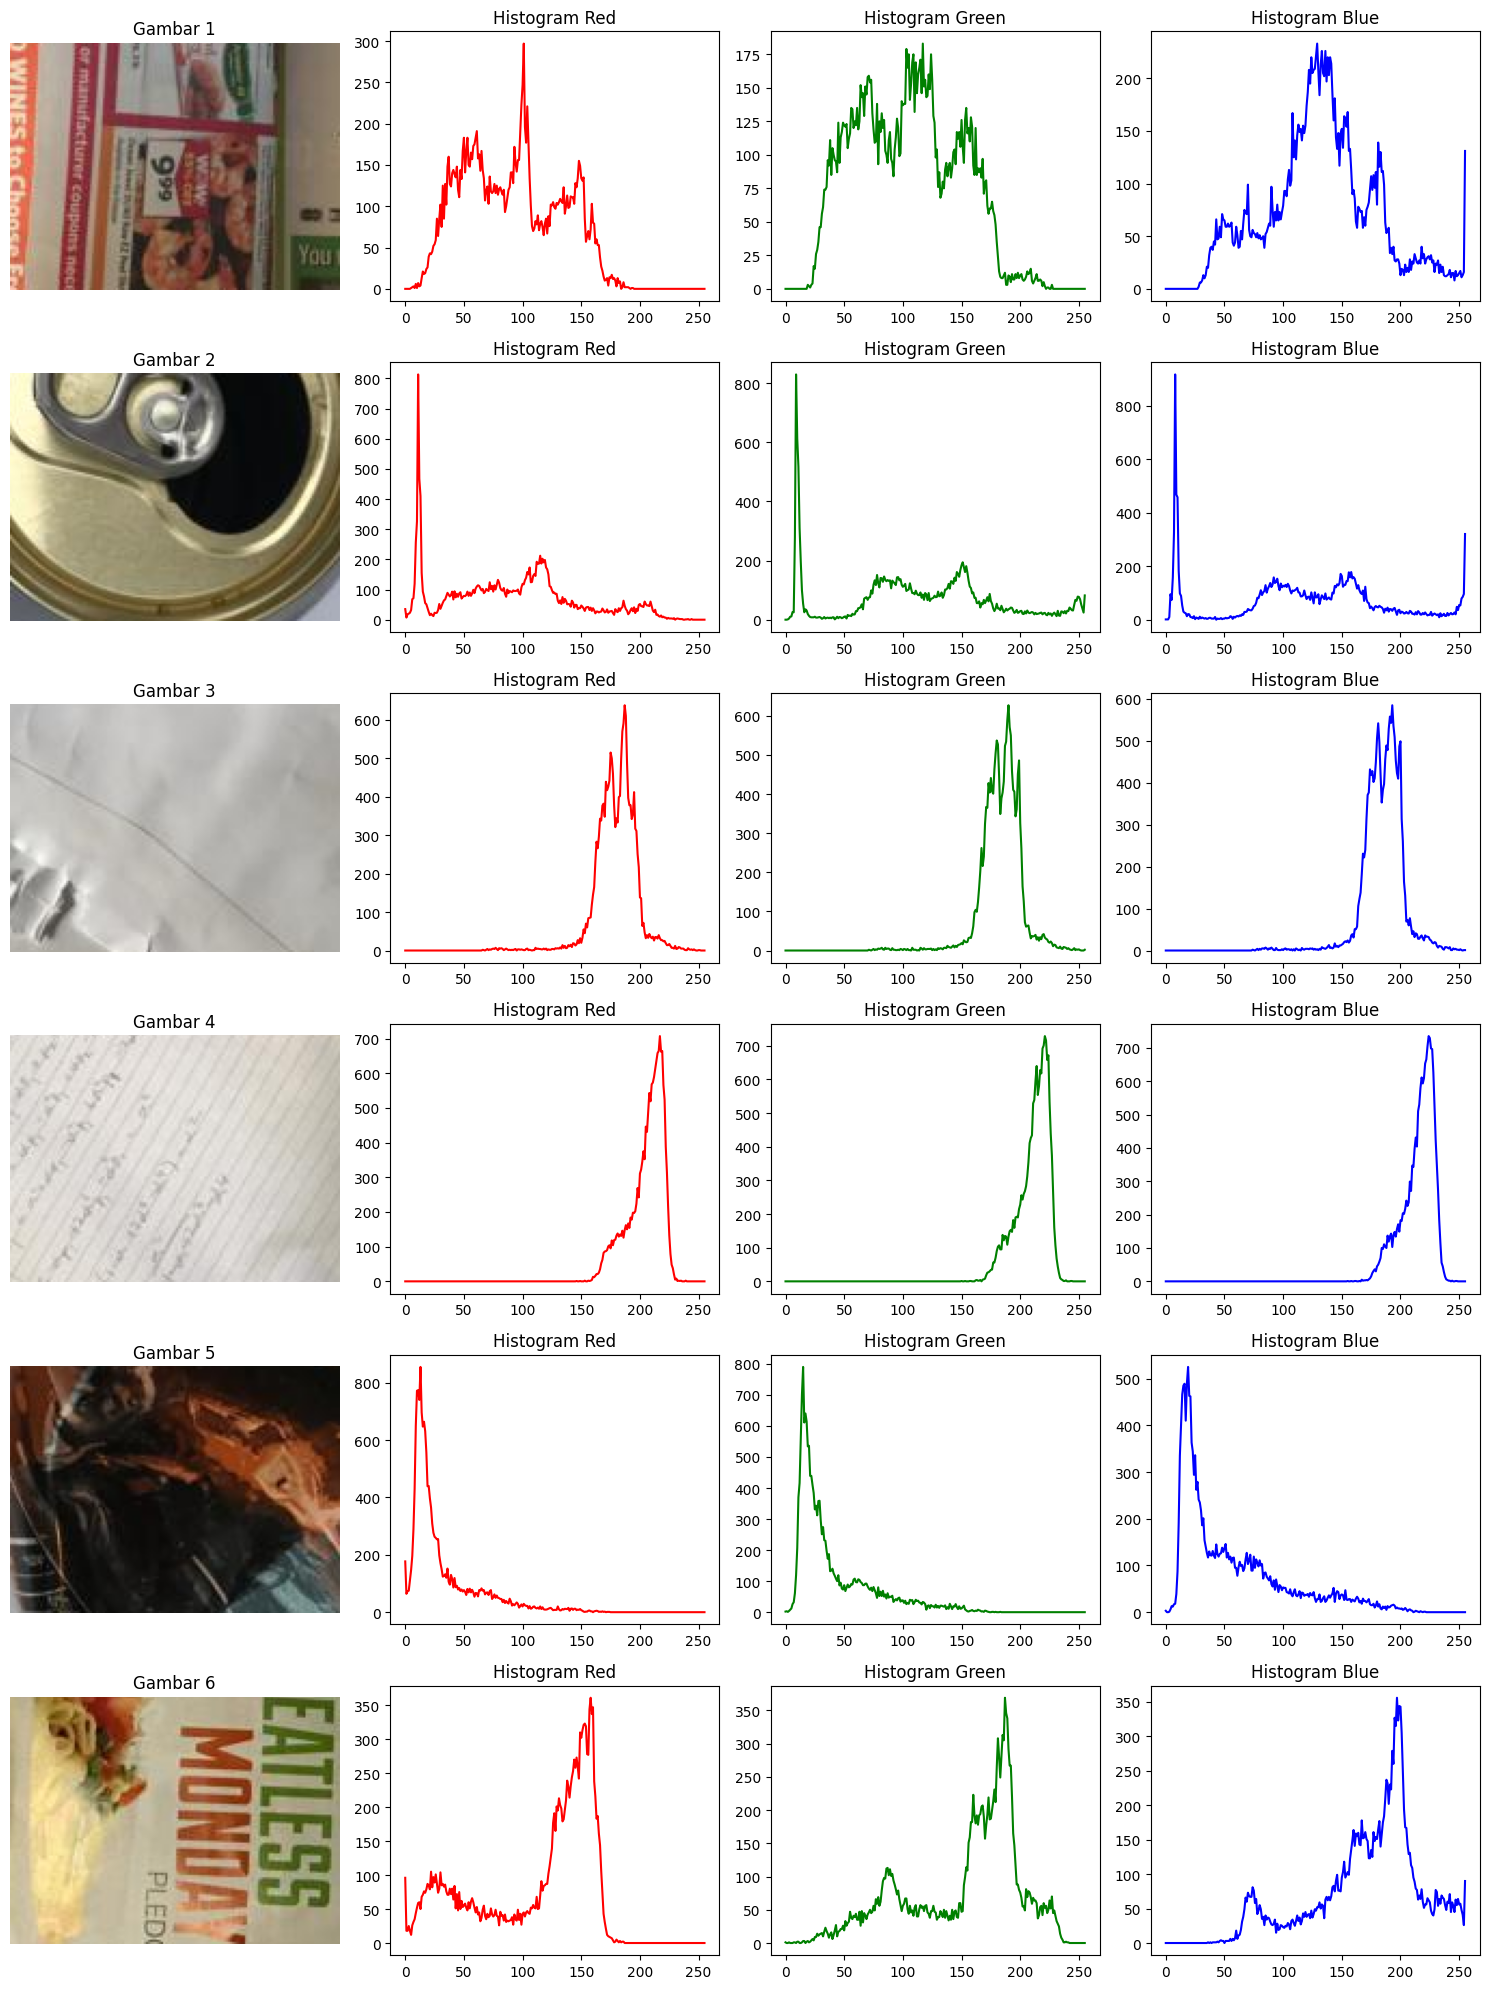

In [ ]:

def extract_rgb_values(roi):
    red, green, blue = cv2.split(roi)
    return red, green, blue

def calculate_color_histogram(channel):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    return hist

random_img_list = random.sample(img_list, 6)

plt.figure(figsize=(15, 20))
for i, img_path in enumerate(random_img_list):
    img = cv2.imread(img_path)
    roi = define_roi_based_on_rule(img)
    red, green, blue = extract_rgb_values(roi)
    hist_red = calculate_color_histogram(red)
    hist_green = calculate_color_histogram(green)
    hist_blue = calculate_color_histogram(blue)

    plt.subplot(6, 4, i*4 + 1)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title("Gambar " + str(i + 1))
    plt.axis('off')

    plt.subplot(6, 4, i*4 + 2)
    plt.plot(hist_red, color='r')
    plt.title("Histogram Red")

    plt.subplot(6, 4, i*4 + 3)
    plt.plot(hist_green, color='g')
    plt.title("Histogram Green")

    plt.subplot(6, 4, i*4 + 4)
    plt.plot(hist_blue, color='b')
    plt.title("Histogram Blue")

plt.tight_layout()
plt.show()


In [ ]:
import cv2
import numpy as np

def extract_rgb_values(roi):
    red, green, blue = cv2.split(roi)
    return red, green, blue

r_values = []
g_values = []
b_values = []

for img_path in img_list:
    img = cv2.imread(img_path)
    roi = define_roi_based_on_rule(img)
    red, green, blue = extract_rgb_values(roi)

    r_mean = np.mean(red)
    g_mean = np.mean(green)
    b_mean = np.mean(blue)

    r_values.append(r_mean)
    g_values.append(g_mean)
    b_values.append(b_mean)

for i in range(len(img_list)):
    print(f"Gambar {i+1}:")
    print(f"   Rata-rata R: {r_values[i]}")
    print(f"   Rata-rata G: {g_values[i]}")
    print(f"   Rata-rata B: {b_values[i]}")


Gambar 1:
   Rata-rata R: 164.10843989769822
   Rata-rata G: 157.78846263142938
   Rata-rata B: 152.65666382495027
Gambar 2:
   Rata-rata R: 136.38334754191533
   Rata-rata G: 124.63989769820972
   Rata-rata B: 100.69849389030975
Gambar 3:
   Rata-rata R: 159.11031543052005
   Rata-rata G: 146.76601307189543
   Rata-rata B: 132.04512645637965
Gambar 4:
   Rata-rata R: 75.20824097755045
   Rata-rata G: 134.4073316283035
   Rata-rata B: 156.91872691105428
Gambar 5:
   Rata-rata R: 106.49383347541915
   Rata-rata G: 119.88150042625746
   Rata-rata B: 117.62421142369992
Gambar 6:
   Rata-rata R: 149.16084114805344
   Rata-rata G: 134.5556123898835
   Rata-rata B: 113.11406649616369
Gambar 7:
   Rata-rata R: 162.92054560954816
   Rata-rata G: 153.77942597328786
   Rata-rata B: 151.0588803637397
Gambar 8:
   Rata-rata R: 155.60011366865587
   Rata-rata G: 153.94782608695652
   Rata-rata B: 152.12549019607843
Gambar 9:
   Rata-rata R: 66.99204319408923
   Rata-rata G: 127.56385336743394
   Ra

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Gambar': img_list,
    'Rata-rata R': r_values,
    'Rata-rata G': g_values,
    'Rata-rata B': b_values,
})
print(df)

                                                Gambar  Rata-rata R  \
0    /content/drive/My Drive/Colab Notebooks/Datase...   164.108440   
1    /content/drive/My Drive/Colab Notebooks/Datase...   136.383348   
2    /content/drive/My Drive/Colab Notebooks/Datase...   159.110315   
3    /content/drive/My Drive/Colab Notebooks/Datase...    75.208241   
4    /content/drive/My Drive/Colab Notebooks/Datase...   106.493833   
..                                                 ...          ...   
595  /content/drive/My Drive/Colab Notebooks/Datase...    94.296618   
596  /content/drive/My Drive/Colab Notebooks/Datase...    74.988463   
597  /content/drive/My Drive/Colab Notebooks/Datase...   105.408696   
598  /content/drive/My Drive/Colab Notebooks/Datase...   116.692583   
599  /content/drive/My Drive/Colab Notebooks/Datase...    91.438534   

     Rata-rata G  Rata-rata B  
0     157.788463   152.656664  
1     124.639898   100.698494  
2     146.766013   132.045126  
3     134.407332   

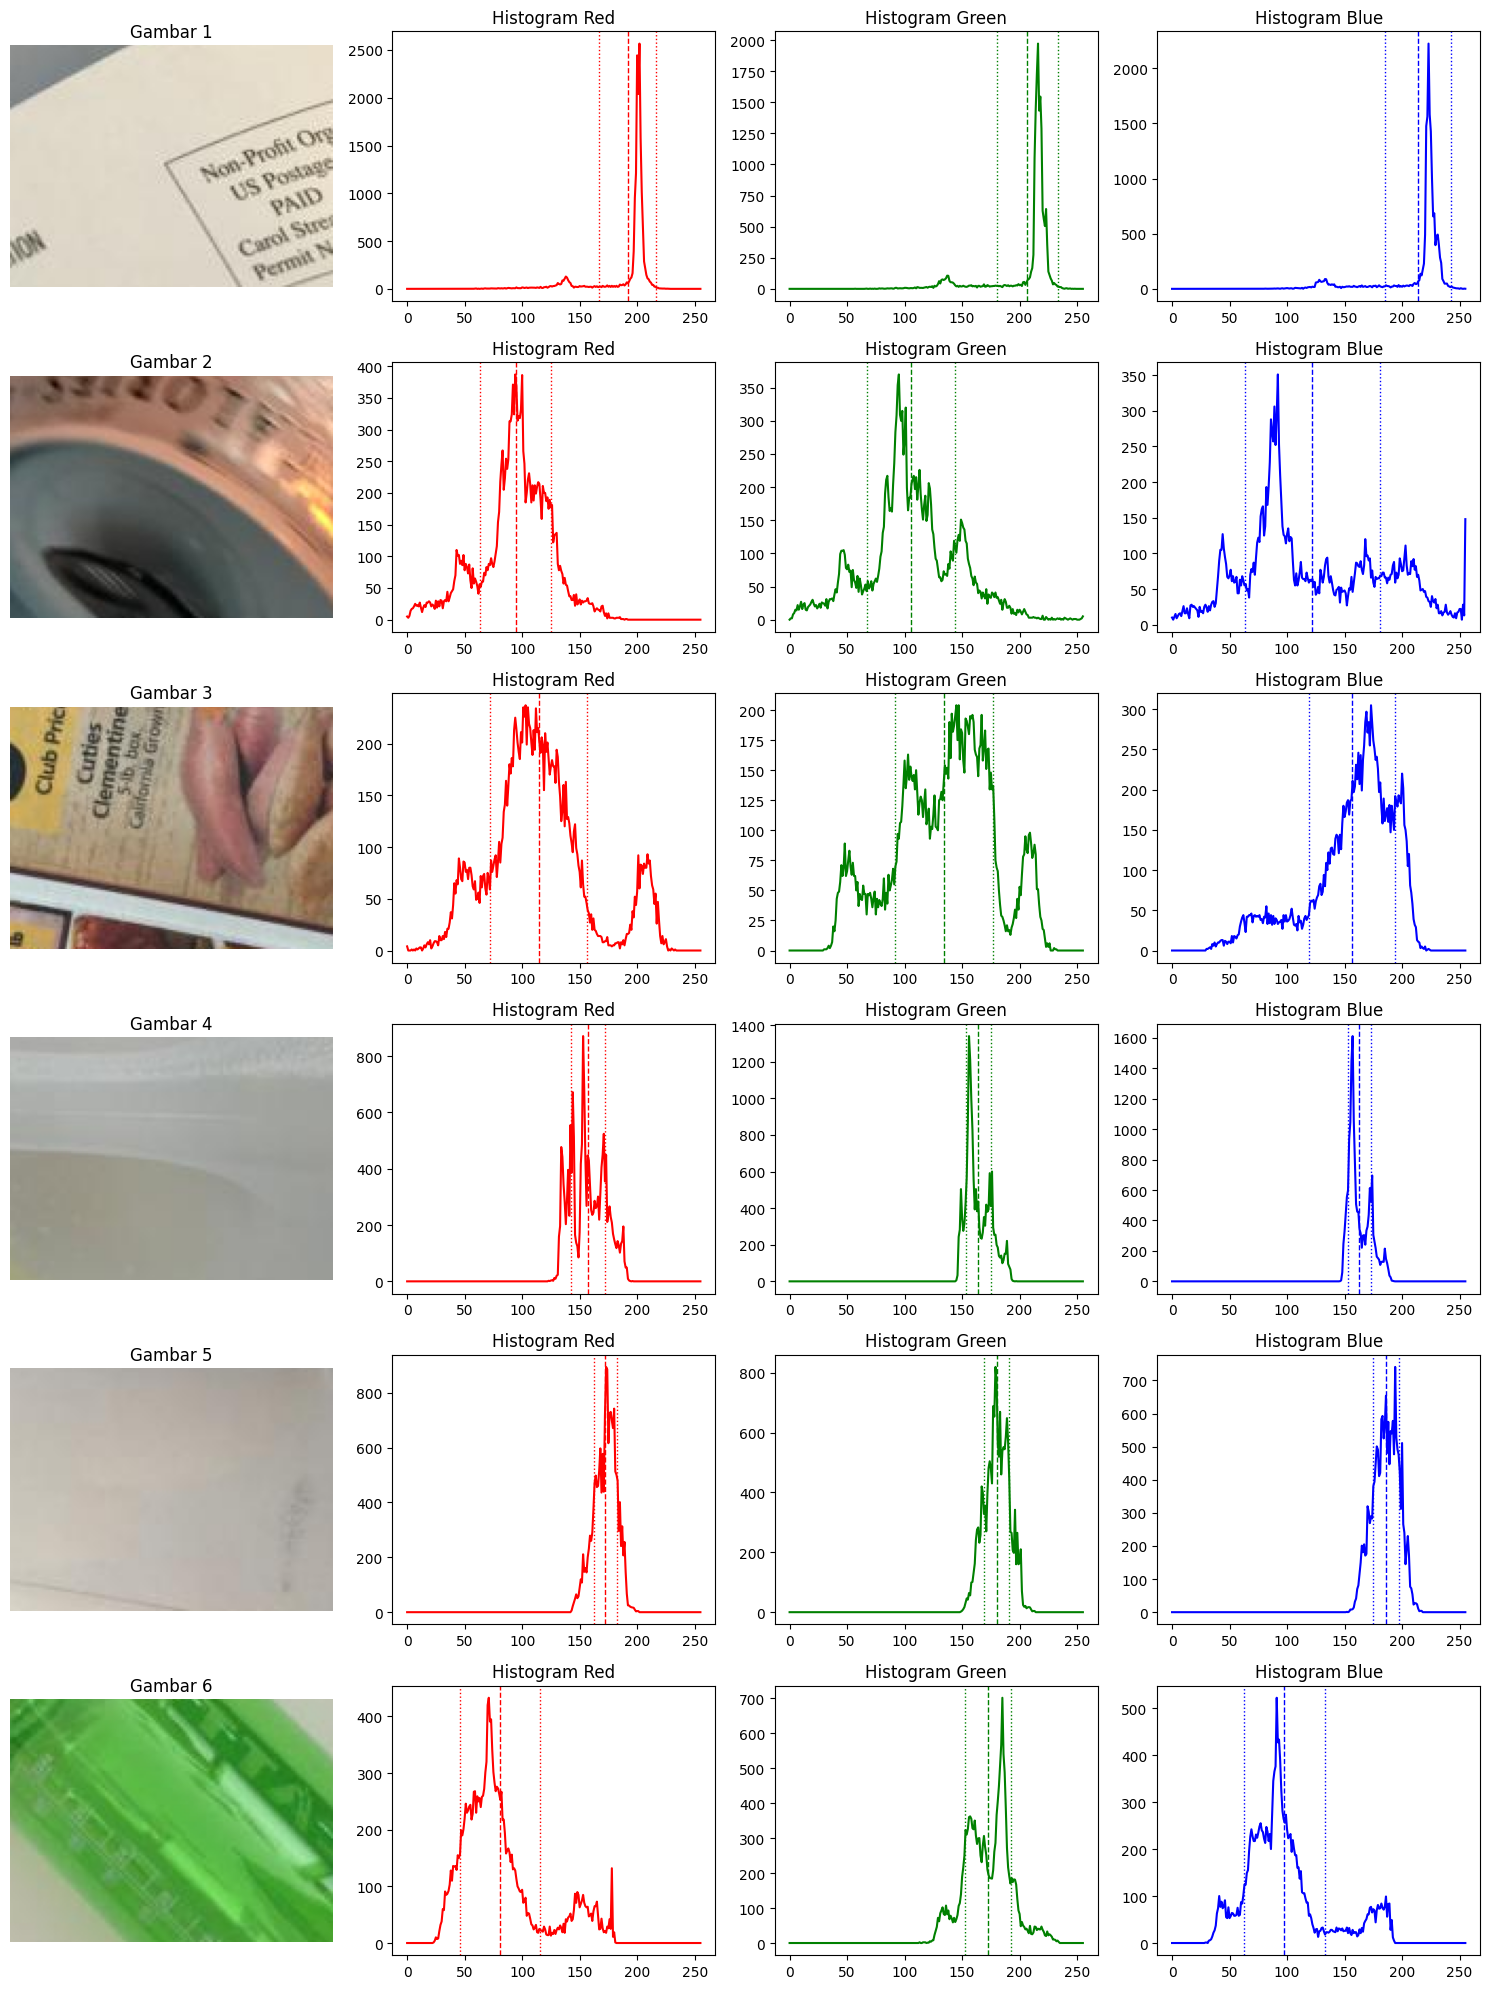

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Fungsi untuk mengekstrak nilai RGB dari ROI
def extract_rgb_values(roi):
    red, green, blue = cv2.split(roi)
    return red, green, blue

# Fungsi untuk menghitung histogram warna
def calculate_color_histogram(channel):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    return hist

# Fungsi untuk menampilkan garis rata-rata dan standar deviasi pada histogram
def plot_histogram_with_stats(channel_hist, mean, std_dev, color, subplot_idx, title):
    plt.subplot(6, 4, subplot_idx)
    plt.plot(channel_hist, color=color)
    plt.axvline(x=mean, color=color, linestyle='dashed', linewidth=1)
    plt.axvline(x=mean + std_dev, color=color, linestyle='dotted', linewidth=1)
    plt.axvline(x=mean - std_dev, color=color, linestyle='dotted', linewidth=1)
    plt.title(title)

# Daftar gambar
random_img_list = random.sample(img_list, 6)

# Plot histogram dan garis rata-rata/standar deviasi
plt.figure(figsize=(15, 20))
for i, img_path in enumerate(random_img_list):
    img = cv2.imread(img_path)
    roi = define_roi_based_on_rule(img)
    red, green, blue = extract_rgb_values(roi)
    hist_red = calculate_color_histogram(red)
    hist_green = calculate_color_histogram(green)
    hist_blue = calculate_color_histogram(blue)

    r_mean = np.mean(red)
    g_mean = np.mean(green)
    b_mean = np.mean(blue)
    r_std_dev = np.std(red)
    g_std_dev = np.std(green)
    b_std_dev = np.std(blue)

    plt.subplot(6, 4, i*4 + 1)
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.title("Gambar " + str(i + 1))
    plt.axis('off')

    plot_histogram_with_stats(hist_red, r_mean, r_std_dev, 'r', i*4 + 2, "Histogram Red")
    plot_histogram_with_stats(hist_green, g_mean, g_std_dev, 'g', i*4 + 3, "Histogram Green")
    plot_histogram_with_stats(hist_blue, b_mean, b_std_dev, 'b', i*4 + 4, "Histogram Blue")

plt.tight_layout()
plt.show()


In [ ]:
df

,Gambar,Rata-rata R,Rata-rata G,Rata-rata B
0,/content/drive/My Drive/Colab Notebooks/Datase...,164.108440,157.788463,152.656664
1,/content/drive/My Drive/Colab Notebooks/Datase...,136.383348,124.639898,100.698494
2,/content/drive/My Drive/Colab Notebooks/Datase...,159.110315,146.766013,132.045126
3,/content/drive/My Drive/Colab Notebooks/Datase...,75.208241,134.407332,156.918727
4,/content/drive/My Drive/Colab Notebooks/Datase...,106.493833,119.881500,117.624211
...,...,...,...,...
595,/content/drive/My Drive/Colab Notebooks/Datase...,94.296618,105.523046,122.038988
596,/content/drive/My Drive/Colab Notebooks/Datase...,74.988463,90.643421,120.479341
597,/content/drive/My Drive/Colab Notebooks/Datase...,105.408696,123.580961,158.813527
598,/content/drive/My Drive/Colab Notebooks/Datase...,116.692583,113.262631,111.541461


In [ ]:
from math import sqrt, pi, exp
import openpyxl

In [ ]:
file_path = 'Klasifikasi Jenis Sampah.xlsx'
df = pd.read_excel(file_path)

print(df.head())

   Rata-rata R  Rata-rata G  Rata-rata B    Class
0   164.108440   157.788463   152.656664  plastic
1   136.383348   124.639898   100.698494  plastic
2   159.110315   146.766013   132.045126  plastic
3    75.208241   134.407332   156.918727  plastic
4   106.493833   119.881500   117.624211  plastic


In [ ]:
X = df[['Rata-rata R', 'Rata-rata G', 'Rata-rata B']].values
y = df['Class'].values

In [ ]:
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def summarize_by_class(X, y):
    separated = {}
    for i in range(len(X)):
        vector = X[i]
        class_value = y[i]
        if class_value not in separated:
            separated[class_value] = []
        separated[class_value].append(vector)
    summaries = {}
    for class_value, vectors in separated.items():
        summaries[class_value] = [(np.mean(attribute), np.var(attribute)) for attribute in zip(*vectors)]
    return summaries

summaries = summarize_by_class(X_train, y_train)


In [ ]:
def calculate_probability(x, mean, var):
    exponent = exp(-((x - mean)**2 / (2 * var)))
    return (1 / (sqrt(2 * pi * var))) * exponent

In [ ]:
def calculate_prior_probabilities(y_train):
    prior_probabilities = {}
    total_samples = len(y_train)
    for class_value in np.unique(y_train):
        prior_probabilities[class_value] = np.sum(y_train == class_value) / total_samples
    return prior_probabilities

prior_probabilities = calculate_prior_probabilities(y_train)


In [ ]:
def calculate_class_probabilities(summaries, input_vector, prior_probabilities):
    probabilities = {}
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = prior_probabilities[class_value]
        for i in range(len(class_summaries)):
            mean, var = class_summaries[i]
            x = input_vector[i]
            probabilities[class_value] *= calculate_probability(x, mean, var)
    return probabilities

In [ ]:
def predict(summaries, input_vector, prior_probabilities):
    probabilities = calculate_class_probabilities(summaries, input_vector, prior_probabilities)
    total_prob = sum(probabilities.values())
    normalized_probabilities = {class_value: probability / total_prob for class_value, probability in probabilities.items()}
    best_label, best_prob = max(normalized_probabilities.items(), key=lambda x: x[1])
    return best_label, normalized_probabilities

predictions = []
probabilities_list = []
for x in X_test:
    label, probabilities = predict(summaries, x, prior_probabilities)
    predictions.append(label)
    probabilities_list.append(probabilities)

print("\nPrediksi untuk data pengujian:")
for i in range(len(X_test)):
    print(f"Data: {X_test[i]}, Actual: {y_test[i]}, Predicted: {predictions[i]}, Probabilities: {probabilities_list[i]}")



Prediksi untuk data pengujian:
Data: [137.47854504 120.19562376 102.21579994], Actual: plastic, Predicted: plastic, Probabilities: {'plastic': 0.5314730286257421, 'paper': 0.16148363121906928, 'metal': 0.3070433401551887}
Data: [121.82750781 120.23938619 107.19687411], Actual: metal, Predicted: plastic, Probabilities: {'plastic': 0.45981582072360483, 'paper': 0.1586492950799879, 'metal': 0.3815348841964071}
Data: [ 78.2112532  126.58516624 146.14009662], Actual: metal, Predicted: metal, Probabilities: {'plastic': 0.2429876373123435, 'paper': 0.2639835986782249, 'metal': 0.4930287640094317}
Data: [125.16311452 115.06462063  88.68695652], Actual: plastic, Predicted: plastic, Probabilities: {'plastic': 0.4576164489473828, 'paper': 0.11348527807936223, 'metal': 0.428898272973255}
Data: [21.71395283 35.742711   34.88002273], Actual: plastic, Predicted: metal, Probabilities: {'plastic': 0.00025248525774481084, 'paper': 0.008054419367354978, 'metal': 0.9916930953749002}
Data: [158.36351236 1

In [ ]:
accuracy = np.mean(np.array(predictions) == y_test)
print(f"\nAkurasi: {accuracy}")



Akurasi: 0.6083333333333333


In [ ]:
pip install gradio


In [ ]:
from PIL import Image
import numpy as np
import gradio as gr
import pandas as pd


def extract_features(image):
    image = image.resize((256, 256))
    image_np = np.array(image)
    r_mean = np.mean(image_np[:, :, 0])
    g_mean = np.mean(image_np[:, :, 1])
    b_mean = np.mean(image_np[:, :, 2])
    return np.array([r_mean, g_mean, b_mean])

def predict_image(image):
    features = extract_features(image)
    label, probabilities = predict(summaries, features, prior_probabilities)
    total_prob = sum(probabilities.values())
    probabilities = {k: '{:.2f}%'.format((v / total_prob) * 100) for k, v in probabilities.items()}
    return f"Predicted: {label}", probabilities

interface = gr.Interface(
    fn=predict_image,
    inputs=gr.Image(type="pil"),
    outputs=[
        gr.Textbox(label="Prediction"),
        gr.JSON(label="Probabilities")
    ],
    title="Klasifiikasi Jenis Sampah",
    description="Upload gambar untuk mengklasifikasikan sampah metal, paper, atau plastic."
)

interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c3fce47d42c15a39f5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
